# INM702 Coursework Task 3
### Aaron Mir (Student Number: 160001207)

<img src="Task3Overview.jpg" alt="Task2Overview" width="700"/>

The third task is about comparing your results with architectures developed using PyTorch. 

    • Compare the results obtained in Task 2 to the results obtained using the same architectures implemented in PyTorch.
    
    • Then, propose improvements and new architectures that make use of more advanced methods (e.g. Convolutional Neural Networks, dropout, ...).

    • Compare the results. 

    • Finally, present the confusion matrix of your best model.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torchvision
from torchvision import transforms, datasets
import sklearn
from sklearn import metrics, preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
print(f"Python: {sys.version}")
print(f"Numpy Version: {np.__version__}")
print(f"PyTorch Version: {torch.__version__}")
print(f"Sklearn Version: {sklearn.__version__}")

Python: 3.8.1 (tags/v3.8.1:1b293b6, Dec 18 2019, 23:11:46) [MSC v.1916 64 bit (AMD64)]
Numpy Version: 1.18.1
PyTorch Version: 1.6.0+cu101
Sklearn Version: 0.23.1


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [46]:
print(device)
print(torch.cuda.get_device_name(0))
print(torch.cuda.memory_allocated())
print(torch.cuda.memory_cached())

cuda:0
GeForce GTX 1080
18524160
18874368


In [7]:
def MNIST_load():
    batch_size = 64
    trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.0,), (1.0,))])
    train_set = datasets.MNIST(root='./dataTask3', train=True, download=True, transform=trans)
    test_set = datasets.MNIST(root='./dataTask3', train=False, download=True, transform=trans)
    train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)          
    test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)
    return train_set, test_set, train_loader, test_loader

In [8]:
train_set, test_set, train_loader, test_loader = MNIST_load()

In [51]:
print(len(train_loader))
print(len(test_loader))

938
157


In [53]:
for i, (images, labels) in enumerate(train_loader):           # checking to see if the data  is in the right format
    print(i, images.size(), len(labels))
    break

0 torch.Size([64, 1, 28, 28]) 64


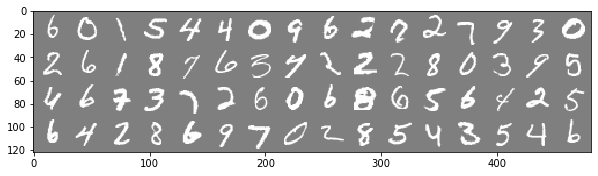

In [57]:
def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.figure(figsize=(10, 10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)                               # pulls one batch from the loader
images, labels = dataiter.next()                            # pulls out 64 images for one batch
imshow(torchvision.utils.make_grid(images, nrow=16))
images = images.to(device)
labels = labels.to(device)

In [47]:
#------------------------------------------- Main Neural Network (Fully ReLU) --------------------------------#
class Neural_Network(nn.Module):
    def __init__(self):
        super(Neural_Network, self).__init__()
        self.fc1 = nn.Linear(784, 64)                                    # 784 inputs
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 10)                                       # 10 outputs - 0-9
        self.activation = nn.ReLU()
    
    def forward(self, X):
        X = X.view(-1, 784)                                                 # flattens the tensor
        X = torch.relu(self.fc1(X))
        X = torch.relu(self.fc2(X))
        X = self.fc3(X)
        return x
    
    def name(self):
        return "Neural_Network"

In [48]:
model = Neural_Network().to(device)
optimiser = optim.Adam(params=model.parameters(), lr=0.001, 1)
loss_fn = nn.CrossEntropyLoss()

In [49]:
epochs = 10
history=[]
for epoch in range(epochs):  
    avg_loss = 0
    for batch, (X_train, y_train) in enumerate(train_loader):         #for each batch of images
        #------------Moving to device---------#
        X = X_train.to(device)  
        y = y_train.to(device)  
        X, y = Variable(x), Variable(y)
        #------------Forward Pass---------#
        optimiser.zero_grad()    
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        #------------Recording results---------#
        avg_loss = avg_loss * 0.9 + loss.data * 0.1
        history.append(avg_loss)
        #------------Backward Pass---------#
        loss.backward()
        optimiser.step()    
    print(f'epoch: {epoch}, train loss: {avg_loss:.6f}')

epoch: 0, train loss: 0.190529
epoch: 1, train loss: 0.172715
epoch: 2, train loss: 0.119452
epoch: 3, train loss: 0.104326
epoch: 4, train loss: 0.182511
epoch: 5, train loss: 0.106101
epoch: 6, train loss: 0.089036
epoch: 7, train loss: 0.122652
epoch: 8, train loss: 0.109912
epoch: 9, train loss: 0.068615


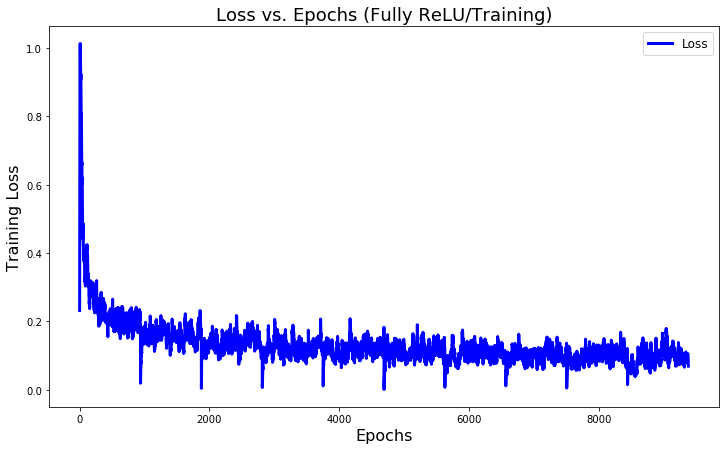

In [50]:
plt.figure(figsize=(12, 7))
plt.plot(history, 'b', linewidth=3.0, label='Loss')
plt.title('Loss vs. Epochs (Fully ReLU/Training)', fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Training Loss', fontsize=16)
plt.legend(fontsize=12)
plt.show()

In [38]:
#------------------------------------------- Main Neural Network (Fully Sigmoid) --------------------------------#
class Neural_Network2(nn.Module):
    def __init__(self):
        super(Neural_Network2, self).__init__()
        self.fc1 = nn.Linear(784, 64)                                       # 784 inputs
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 10)                                        # 10 outputs - 0-9
        
    def forward(self, X):
        X = X.view(-1, 784)
        X = torch.sigmoid(self.fc1(X))
        X = torch.sigmoid(self.fc2(X))
        X = self.fc3(X)
        return X
    
    def name(self):
        return "Neural_Network"

In [39]:
model2 = Neural_Network2().to(device)
optimiser = optim.Adam(model2.parameters(), lr=0.01, betas=(0.9, 0.999), eps=0.0000001)
loss_fn = nn.CrossEntropyLoss()

In [40]:
epochs = 10
history=[]
for epoch in range(epochs):  
    avg_loss = 0
    for batch, (X_train, y_train) in enumerate(train_loader):         #for each batch of images
        #------------Moving to device---------#
        X = X_train.to(device)  
        y = y_train.to(device)  
        #------------Forward Pass---------#
        optimiser.zero_grad()    
        X, y = Variable(X), Variable(y)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        #------------Recording results---------#
        avg_loss = avg_loss * 0.9 + loss.data * 0.1
        history.append(avg_loss)
        #------------Backward Pass---------#
        loss.backward()
        optimiser.step()    
    print(f'epoch: {epoch}, train loss: {avg_loss:.6f}')

epoch: 0, batch index:938, train loss: 0.075389
epoch: 1, batch index:938, train loss: 0.051224
epoch: 2, batch index:938, train loss: 0.076047
epoch: 3, batch index:938, train loss: 0.095995
epoch: 4, batch index:938, train loss: 0.057823
epoch: 5, batch index:938, train loss: 0.069751
epoch: 6, batch index:938, train loss: 0.072287
epoch: 7, batch index:938, train loss: 0.082969
epoch: 8, batch index:938, train loss: 0.062298
epoch: 9, batch index:938, train loss: 0.043569


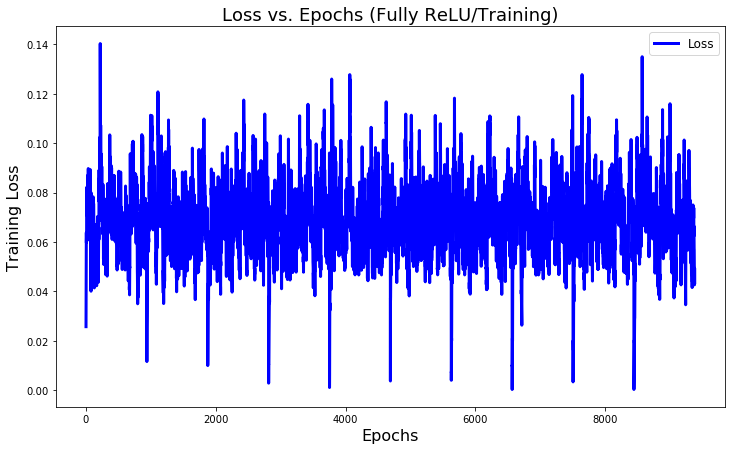

In [43]:
plt.figure(figsize=(12, 7))
plt.plot(history, 'b', linewidth=3.0, label='Loss')
plt.title('Loss vs. Epochs (Fully ReLU/Training)', fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Training Loss', fontsize=16)
plt.legend(fontsize=12)
plt.show()

In [ ]:
''' DEFINING CONFUSION MATRIX PLOT FUNCTION TAKEN FROM SKLEARN WEBSITE'''
def plot_confusion_matrix(cm, classes, 
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [ ]:
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm = cm, classes = cm_plot_labels, title = 'Confusion Matrix')